In [ ]:
"""
Notebook 00 - Préparation des données textuelles pour NLP
---------------------------------------------------------

Objectif :
- Charger le dataset JSON brut (podcasts)
- Extraire uniquement les colonnes pertinentes
- Nettoyer les keywords
- Construire une feature textuelle "text_keywords"
- Sauvegarder un dataset propre pour annotation ou enrichissement LLM

Ce notebook ne fait PAS :
- annotation
- data augmentation
- enrichissement 
- EDA
- modélisation

"""


# Imports

In [1]:
import json
import pandas as pd
import numpy as np
from pathlib import Path


# Data loading

In [3]:

json_path = "../data/raw/podcasts_without_transc.json"  

with open(json_path, "r", encoding="utf-8") as f:
    raw_data = json.load(f)

len(raw_data)


33

In [4]:
df = pd.DataFrame(raw_data)
df.head()

,id,title,audio_url,year,month,day,hour,minute,second,weekday,yearday,is_dst,subtitle,authors,image,itunes_duration,full_path,description,keywords,topic
0,8475b9a1-84c3-42d5-976d-15c06d466099,#2418 - Chris Williamson,https://traffic.megaphone.fm/GLT1284914876.mp3...,2025,11,26,18,0,0,2,330,0,,[{'name': 'Joe Rogan'}],{'href': 'https://megaphone.imgix.net/podcasts...,10490,data/bronze/audio/#2418 - Chris Williamson.mp3,"This episode explores a wide range of topics, ...","[conviction, climate change, social media, scr...",Mixed Topics
1,18279a74-6f0a-4470-8d2f-fcf775377cf2,#2419 - John Lisle,https://traffic.megaphone.fm/GLT4343304864.mp3...,2025,11,27,18,0,0,3,331,0,,[{'name': 'Joe Rogan'}],{'href': 'https://megaphone.imgix.net/podcasts...,9884,data/bronze/audio/#2419 - John Lisle.mp3,"This episode delves into various conspiracies,...","[conspiracy theories, MK Ultra, LSD, CIA, mind...",Conspiracies and Government Experiments
2,ddbdb4db-c85d-4620-99d2-55ff143b1e12,#2420 - Chris Masterjohn,https://traffic.megaphone.fm/GLT6871125742.mp3...,2025,11,29,18,0,0,5,333,0,,[{'name': 'Joe Rogan'}],{'href': 'https://megaphone.imgix.net/podcasts...,8696,data/bronze/audio/#2420 - Chris Masterjohn.mp3,This episode delves into various aspects of he...,"[creatine, energy metabolism, vision, mitochon...",Mixed Topics
3,b5faa887-273a-4a78-bc44-daf39114a779,"#484 – Dan Houser: GTA, Red Dead Redemption, R...",https://media.blubrry.com/takeituneasy/content...,2025,10,31,20,53,37,4,304,0,None,[{'name': 'Lex Fridman'}],{'href': 'https://lexfridman.com/wordpress/wp-...,10441,"data/bronze/audio/#484 – Dan Houser GTA, Red D...","This episode covers a wide range of topics, in...","[game design, open world games, narrative-driv...",Mixed Topics
4,92fdaf1d-e439-4497-9881-6d091e59ebb7,"#485 – David Kirtley: Nuclear Fusion, Plasma P...",https://media.blubrry.com/takeituneasy/ins.blu...,2025,11,17,18,55,13,0,321,0,None,[{'name': 'Lex Fridman'}],{'href': 'https://lexfridman.com/wordpress/wp-...,N/A,data/bronze/audio/#485 – David Kirtley Nuclear...,This episode explores nuclear fusion and fissi...,"[fusion, nuclear power, energy production, str...",Physics and Energy


# Preparation

In [5]:
columns_to_keep = ["id", "title", "keywords"]
df = df[columns_to_keep].copy()
df.head()


,id,title,keywords
0,8475b9a1-84c3-42d5-976d-15c06d466099,#2418 - Chris Williamson,"[conviction, climate change, social media, scr..."
1,18279a74-6f0a-4470-8d2f-fcf775377cf2,#2419 - John Lisle,"[conspiracy theories, MK Ultra, LSD, CIA, mind..."
2,ddbdb4db-c85d-4620-99d2-55ff143b1e12,#2420 - Chris Masterjohn,"[creatine, energy metabolism, vision, mitochon..."
3,b5faa887-273a-4a78-bc44-daf39114a779,"#484 – Dan Houser: GTA, Red Dead Redemption, R...","[game design, open world games, narrative-driv..."
4,92fdaf1d-e439-4497-9881-6d091e59ebb7,"#485 – David Kirtley: Nuclear Fusion, Plasma P...","[fusion, nuclear power, energy production, str..."


In [8]:
df["n_keywords"] = df["keywords"].apply(lambda x: len(x))
df["n_keywords"].describe()


count    33.000000
mean     19.121212
std       9.009570
min       7.000000
25%      12.000000
50%      17.000000
75%      24.000000
max      39.000000
Name: n_keywords, dtype: float64

In [14]:
def clean_keywords(keywords):
    if not isinstance(keywords, list):
        return []
    cleaned = []
    for kw in keywords:
        kw = kw.strip().lower()
        if len(kw) > 2:
            cleaned.append(kw)
    return list(dict.fromkeys(cleaned))  # remove duplicates, preserve order

df["keywords_clean"] = df["keywords"].apply(clean_keywords)
df.head()


,id,title,keywords,n_keywords,keywords_clean
0,8475b9a1-84c3-42d5-976d-15c06d466099,#2418 - Chris Williamson,"[conviction, climate change, social media, scr...",32,"[conviction, climate change, social media, scr..."
1,18279a74-6f0a-4470-8d2f-fcf775377cf2,#2419 - John Lisle,"[conspiracy theories, MK Ultra, LSD, CIA, mind...",14,"[conspiracy theories, mk ultra, lsd, cia, mind..."
2,ddbdb4db-c85d-4620-99d2-55ff143b1e12,#2420 - Chris Masterjohn,"[creatine, energy metabolism, vision, mitochon...",39,"[creatine, energy metabolism, vision, mitochon..."
3,b5faa887-273a-4a78-bc44-daf39114a779,"#484 – Dan Houser: GTA, Red Dead Redemption, R...","[game design, open world games, narrative-driv...",33,"[game design, open world games, narrative-driv..."
4,92fdaf1d-e439-4497-9881-6d091e59ebb7,"#485 – David Kirtley: Nuclear Fusion, Plasma P...","[fusion, nuclear power, energy production, str...",14,"[fusion, nuclear power, energy production, str..."


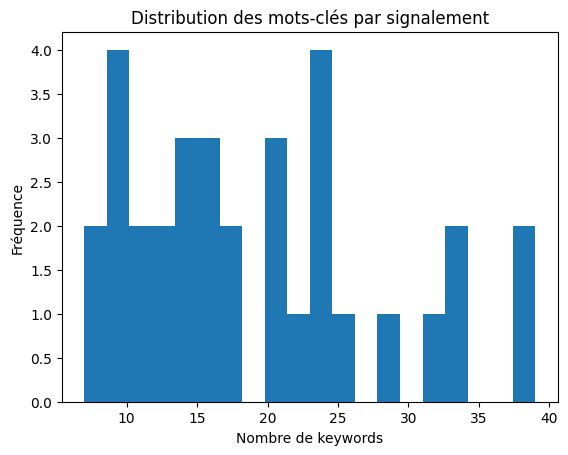

In [15]:
import matplotlib.pyplot as plt

plt.hist(df["n_keywords"], bins=20)
plt.xlabel("Nombre de keywords")
plt.ylabel("Fréquence")
plt.title("Distribution des mots-clés par signalement")
plt.show()


In [17]:
#taille du vocab total
all_keywords = [kw for row in df["keywords_clean"] for kw in row]
len(set(all_keywords))


551

In [18]:
#top keywords
from collections import Counter

kw_counts = Counter(all_keywords)
kw_counts.most_common(20)

[('social media', 5),
 ('relationships', 5),
 ('mental health', 4),
 ('self-care', 4),
 ('true crime', 4),
 ('investigation', 4),
 ('comedy', 3),
 ('creativity', 3),
 ('podcasting', 3),
 ('motherhood', 3),
 ('family', 3),
 ('communication', 3),
 ('divorce', 3),
 ('murder', 3),
 ('dopamine', 2),
 ('success', 2),
 ('stand-up comedy', 2),
 ('competition', 2),
 ('entertainment', 2),
 ('music industry', 2)]

In [19]:
output_path = "../data/interim/podcasts_keywords_clean.csv"
df.to_csv(output_path, index=False)

print(f"Fichier sauvegardé : {output_path}")

Fichier sauvegardé : ../data/interim/podcasts_keywords_clean.csv
